# Relax challenge

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#to ensure clean outputs ignore the warning messages 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the user log data
df1 = pd.read_csv('takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
#convert to datetime object
df1.time_stamp = pd.to_datetime(df1.time_stamp)

In [4]:
#count number of visits per week
df1['time_stamp'] = pd.to_datetime(df1['time_stamp']) - pd.to_timedelta(7, unit='d')
df1 = df1.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W-MON')])['visited'].sum().reset_index().sort_values('user_id')
df1.head()

,user_id,time_stamp,visited
0,1,2014-04-21,1
12,2,2014-03-24,1
11,2,2014-03-10,1
10,2,2014-03-03,1
9,2,2014-02-10,2


In [5]:
#identify if the user is adopted user or not
df1['adopted_user'] = np.where(df1['visited']>2 , 1,0)
new_df = df1[['user_id', 'adopted_user']].groupby(['user_id']).max()
new_df.sample(10)

,adopted_user
user_id,
1972,0
5208,0
1442,0
8133,0
3492,0
9921,0
8499,0
4389,0
1705,0


In [6]:
#load the user data
df2 = pd.read_csv('takehome_users.csv')
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
#rename object_it to user_id
df2 = df2.rename(columns={'object_id': 'user_id'})
df2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
#join two dataframe
my_df = df2.merge(new_df, on='user_id')
my_df.sample(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
8255,11217,2014-04-09 23:47:24,Dias Vin�cius,ViniciusAraujoDias@gmail.com,SIGNUP_GOOGLE_AUTH,1.397174e+09,1,0,115,NaN,0
7772,10559,2013-07-18 05:24:28,Banks Logan,rhmokhdv@xybhi.com,ORG_INVITE,1.374384e+09,0,0,230,2248.0,0
7488,10185,2012-11-02 13:15:47,Moriarty Milla,MillaMoriarty@gmail.com,ORG_INVITE,1.351862e+09,0,0,266,2269.0,0
7147,9737,2014-02-08 03:53:59,Moeller Lea,LeaMoeller@hotmail.com,PERSONAL_PROJECTS,1.396497e+09,0,0,28,NaN,0
2194,3004,2013-11-28 20:59:22,Cannon Lilia,LiliaTCannon@yahoo.com,PERSONAL_PROJECTS,1.386018e+09,0,1,14,NaN,0
7330,9978,2014-03-16 22:28:30,Kruger Stefan,StefanKruger@yahoo.com,SIGNUP,1.395268e+09,0,0,121,NaN,0
7259,9886,2014-04-10 14:24:14,Chandler Larry,vwxyzdoo@aldgv.com,ORG_INVITE,1.397140e+09,1,1,311,348.0,0
434,583,2013-08-29 06:41:27,Coles Brandon,xsxlkqcm@ekkwg.com,PERSONAL_PROJECTS,1.377931e+09,0,0,28,NaN,0
6690,9121,2014-02-19 11:54:03,Caviness Alice,AliceECaviness@yahoo.com,GUEST_INVITE,1.392984e+09,0,0,356,9049.0,0
8477,11536,2013-01-28 17:38:49,Heinicke Riley,RileyHeinicke@hotmail.com,ORG_INVITE,1.359481e+09,1,0,36,2878.0,0


In [9]:
#drop columns
my_df.drop(['user_id', 'creation_time', 'name', 'email','invited_by_user_id', 'org_id','last_session_creation_time'], axis=1, inplace=True)
my_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user
0,GUEST_INVITE,1,0,0
1,ORG_INVITE,0,0,0
2,ORG_INVITE,0,0,0
3,GUEST_INVITE,0,0,0
4,GUEST_INVITE,0,0,0


In [10]:
#count the number of missing data and compute the percentage of missing data
missing = pd.concat([my_df.isnull().sum(), 100 * my_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
creation_source,0,0.0
opted_in_to_mailing_list,0,0.0
enabled_for_marketing_drip,0,0.0
adopted_user,0,0.0


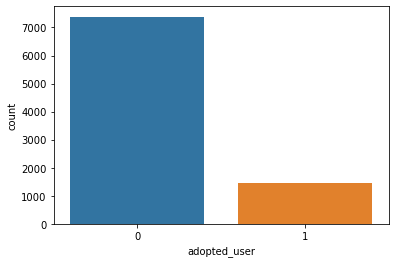

In [11]:
#Our target variable is 'retention'
sns.countplot(x='adopted_user', data =my_df);

There is high class imbalance between for the target variables.

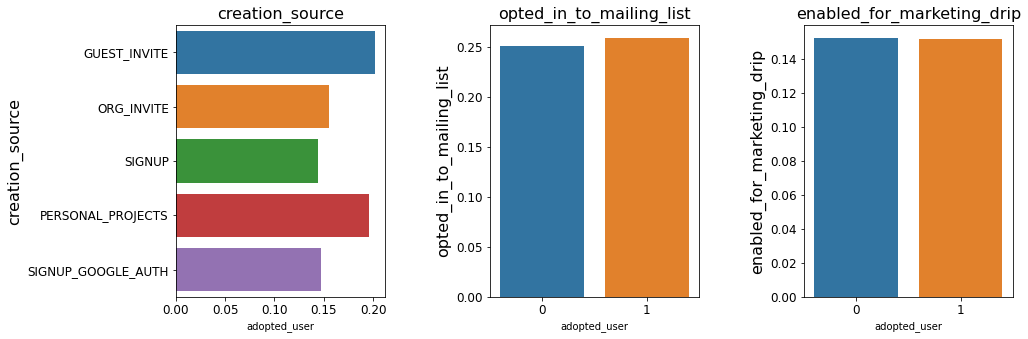

In [12]:
# Bar plot of predictors
x = 1  # subplot row number
y = 3  # subplot column number
z = 1  # counter

fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
fig = plt.grid(b=None)

for i in my_df.columns.drop(['adopted_user']):
    plt.subplot(x, y, z)
    plt.title(i)
    plt.xlabel(i)
    sns.barplot(y=i, x='adopted_user', data=my_df, ci=None)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i, fontsize=16)
    plt.ylabel(i, fontsize=16)
    plt.xlabel('adopted_user')
    #plt.xticks([0,1], ['False', 'True'])
    plt.subplots_adjust(hspace=0.4)
    z += 1

plt.show()

In [13]:
#first let's do onehotencoding for 'creation_source'
my_df = pd.get_dummies(my_df, columns = ['creation_source'])
my_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [14]:
# scale features that are robust to outliers
from sklearn.preprocessing import RobustScaler

X = my_df.drop(columns=['adopted_user'])
y = my_df['adopted_user']

#scale the features
R_scaler = RobustScaler()
X_scaler = R_scaler.fit_transform(X)
X=pd.DataFrame(X_scaler, columns=X.columns)

In [15]:
#split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29)

In [16]:
#run various machine learning model and compute roc-auc score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


models = [
          ('KNN', KNeighborsClassifier()),      
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier()),
          ('SVM', SVC()),
          ('Naive Bayes', GaussianNB())
            ]
    
names=[]
roc_auc_score = []
for name, model in models:
    model.fit(X_train, y_train)
    cv_scores_test= cross_val_score(model,X_test,y_test,cv=5,scoring='roc_auc')
    cv_scores_test_mean= cv_scores_test.mean()
    names.append(name)
    roc_auc_score.append(cv_scores_test_mean)

score = pd.DataFrame([names, roc_auc_score]).T
score.columns = ['Algorithm', 'Roc_auc_score']
score.sort_values("Roc_auc_score", ascending=False, inplace=True)
score

,Algorithm,Roc_auc_score
1,Logistic Regression,0.526252
5,Naive Bayes,0.524251
4,SVM,0.521673
0,KNN,0.519865
3,Gradient Boost,0.514349
2,Random Forest,0.509525


Logitstic regression model performed the best. In the next step, I will perform hyperparameter tuning for the logistic regression model.

In [17]:
#perform hyperparamter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001,0.01,0.1,1,5,10,100], 'solver': ['liblinear']}
lr = LogisticRegression()
lr_cv= GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [18]:
print("Best Parameters: " + str(lr_cv.best_params_))

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
#compute roc_auc for train and test set
lr = LogisticRegression(penalty = 'l2', C=1, solver='liblinear')
lr.fit(X_train,y_train)
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_lr_test= cv_scores_test.mean()
print(cv_scores_lr_test)

0.5252269334071693


In [20]:
#classification report and confusion matrix of the gradientboost model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2199
           1       0.00      0.00      0.00       448

    accuracy                           0.83      2647
   macro avg       0.42      0.50      0.45      2647
weighted avg       0.69      0.83      0.75      2647

[[2199    0]
 [ 448    0]]


Based on the classification report, the model failed completely to predict adopted user. This could be due to the class imbalance in target features. There are several ways to deal with imbalanced datasets such as thresholding, oversampling, undersampling or combinations to improve the performance of the model. In the next step, I will use oversampling to improve the performance of the model.

### Oversampling

In [21]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 7379, 1: 1444})


In [22]:
X = my_df.drop(columns=['adopted_user'])
y = my_df['adopted_user']

#scale the features
R_scaler = RobustScaler()
X_scaler = R_scaler.fit_transform(X)
X=pd.DataFrame(X_scaler, columns=X.columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29)
print('Before oversampling training dataset shape %s' % Counter(y_train))

Before oversampling training dataset shape Counter({0: 5180, 1: 996})


In [24]:
#oversample the training set
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 5180, 1: 5180})


In [25]:
#run various machine learning model and compute roc-auc score
models = [
          ('KNN', KNeighborsClassifier()),      
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier()),
          ('SVM', SVC()),
          ('Naive Bayes', GaussianNB())
            ]
    
names=[]
roc_auc_score = []
for name, model in models:
    model.fit(X_train, y_train)
    cv_scores_test= cross_val_score(model,X_test,y_test,cv=5,scoring='roc_auc')
    cv_scores_test_mean= cv_scores_test.mean()
    names.append(name)
    roc_auc_score.append(cv_scores_test_mean)

score = pd.DataFrame([names, roc_auc_score]).T
score.columns = ['Algorithm', 'Roc_auc_score']
score.sort_values("Roc_auc_score", ascending=False, inplace=True)
score

,Algorithm,Roc_auc_score
1,Logistic Regression,0.526252
5,Naive Bayes,0.524251
4,SVM,0.521673
0,KNN,0.519865
2,Random Forest,0.51518
3,Gradient Boost,0.514349


In [26]:
#fit the best model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2199
           1       0.20      0.30      0.24       448

    accuracy                           0.67      2647
   macro avg       0.52      0.53      0.52      2647
weighted avg       0.73      0.67      0.70      2647

[[1648  551]
 [ 312  136]]


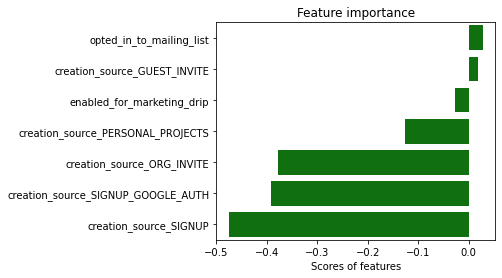

In [27]:
#identify the most predictive features
feature_importances = pd.DataFrame(lr.coef_[0],
                        index = X_train.columns,
                        columns=['importance']).sort_values('importance', ascending=False)

#Bar plot of feature importance
fig = plt.figure(figsize=(5, 4))
sns.barplot(x=feature_importances.importance, y=feature_importances.index,color='g')
plt.xlabel('Scores of features')
plt.title('Feature importance')
plt.show()

## Conclusion

Logistic regression with oversampling performed the best among various machine learning algorithms. ROC-AUC score of the model was 52%. The most important feature to predict adopted_user is 'creation_source' If we do thresholding the performance of the model could improve further.